In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature 시각화 (이상치 제거전)

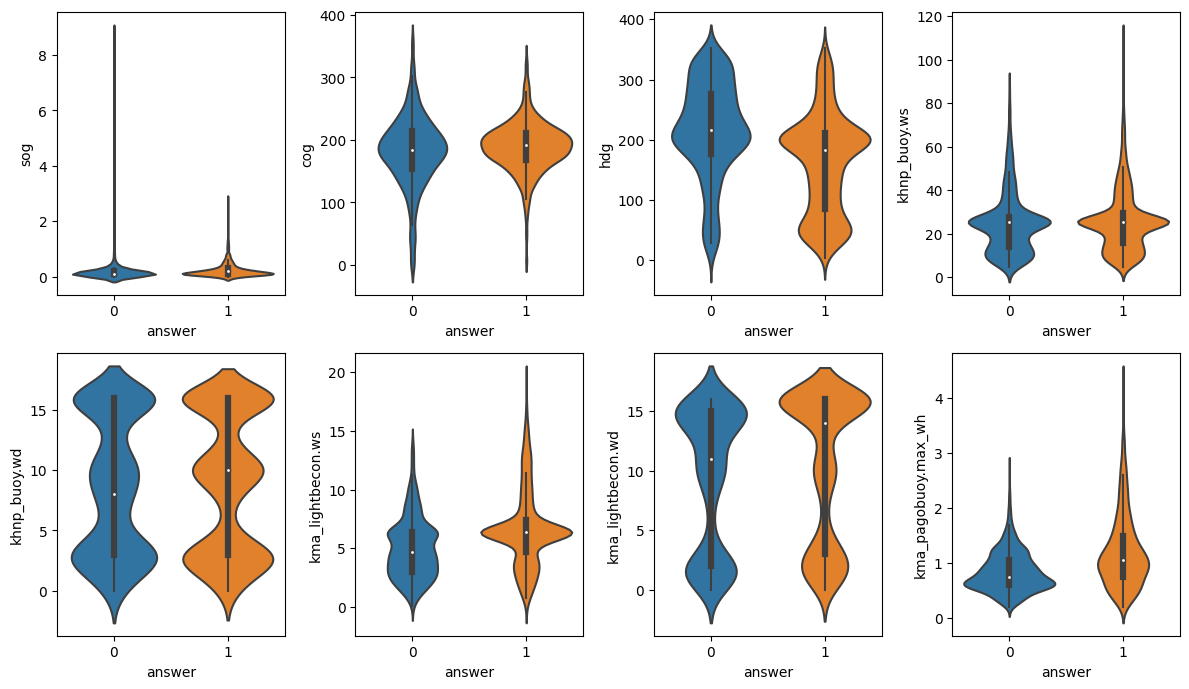

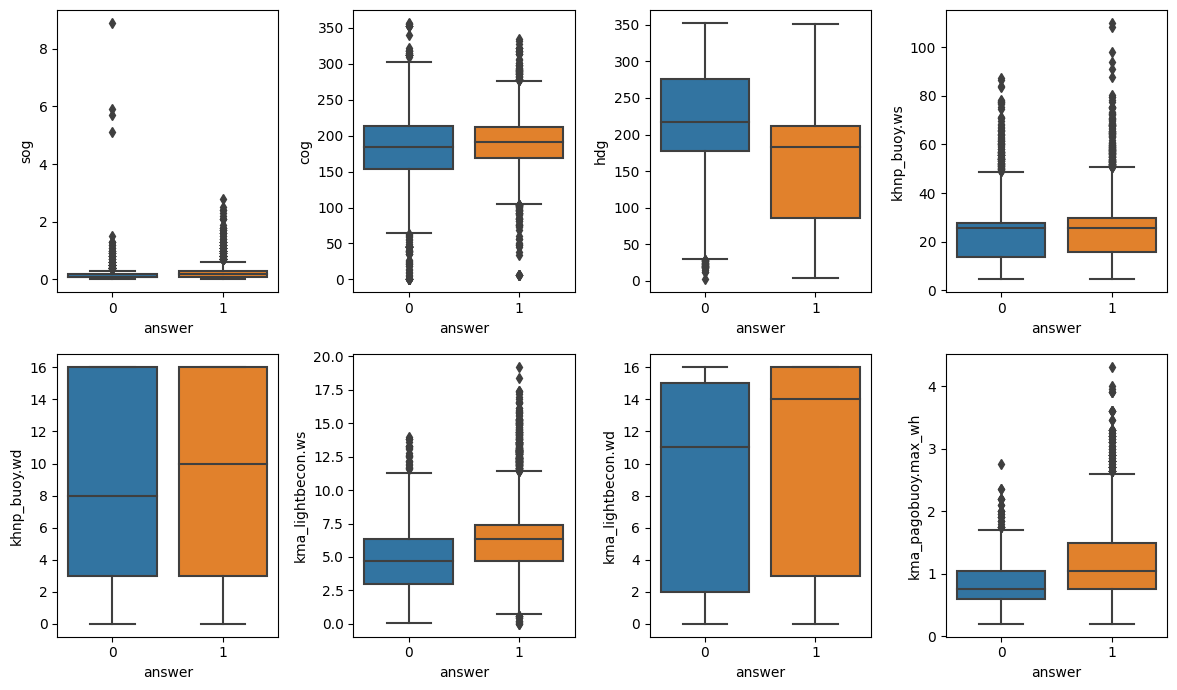

In [2]:
df = pd.read_csv('./통합데이터/df_train_v3_mean.csv')

# 정박 데이터, 닻끌림 발생 데이터
df_0 = df[df['answer'] == 0]  # 정박 데이터
df_1 = df[df['answer'] == 1]  # 닻끌림 발생 데이터

k = df.columns

### khnp_buoy.ws 값 비교 ######################################################
plt.figure(figsize=(12, 7))

for i in range(6, 14):
    plt.subplot(2, 4, i-5)
    sns.violinplot(data=df, x='answer', y=k[i], ci=0)

plt.tight_layout()
plt.show()
#############################################################################


### khnp_buoy.ws 값 비교 ######################################################
plt.figure(figsize=(12, 7))

for i in range(6, 14):
    plt.subplot(2, 4, i-5)
    sns.boxplot(data=df, x='answer', y=k[i])

plt.tight_layout()
plt.show()
##############################################################################

# Feature 시각화 (이상치 제거 후)

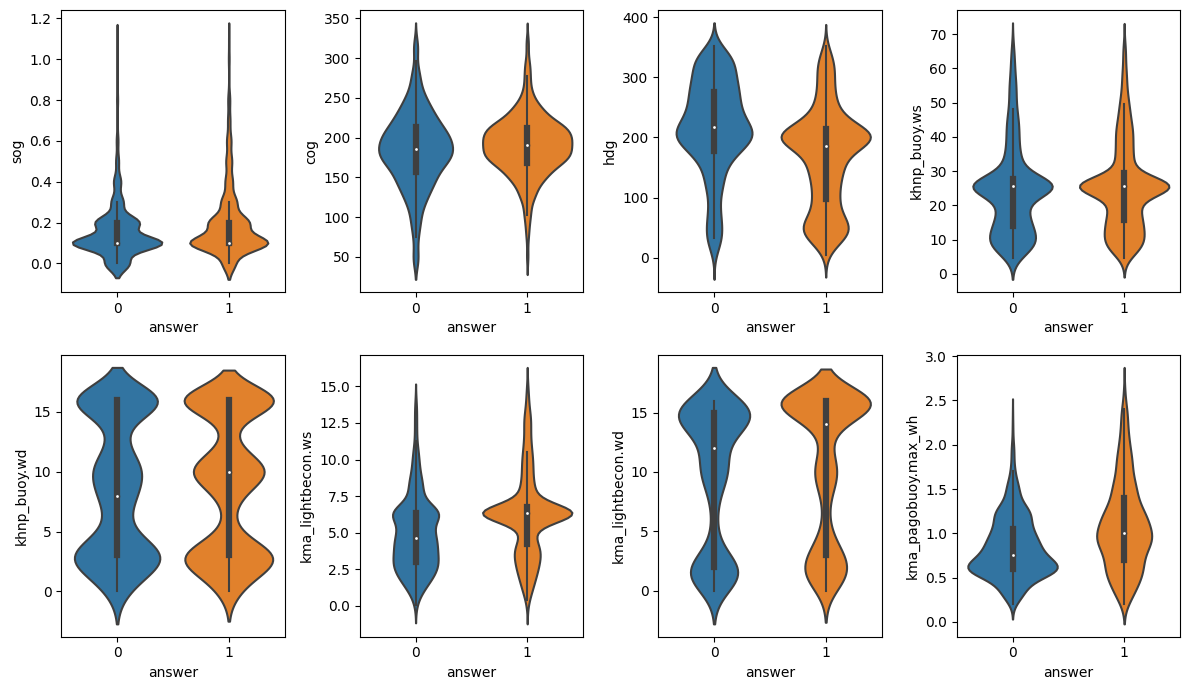

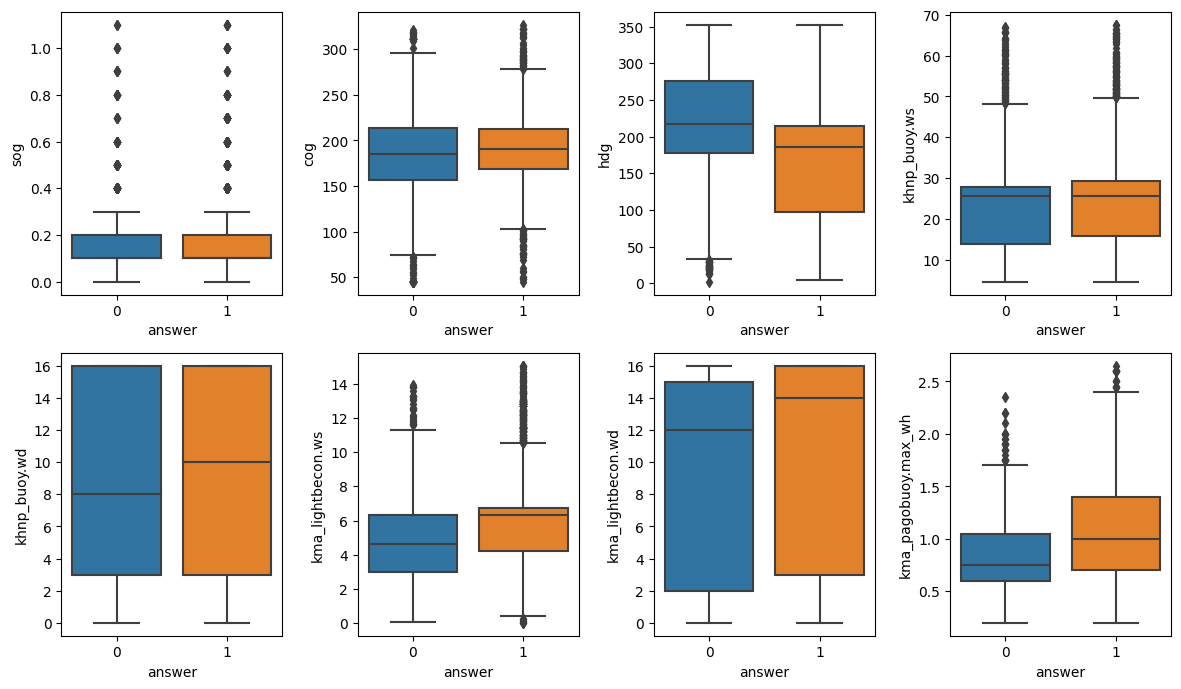

In [5]:
## featur별 이상치 제거
df_mean = pd.read_csv('./통합데이터/df_train_v3_mean.csv')
df = df_mean
columns = df.columns

for column in columns:
    mean = df[column].mean()
    std = df[column].std()
    threshold = 3 * std  # 3시그마 기준

    df = df[np.abs(df[column] - mean) < threshold] # 평균에서 표준편차의 3배 이상 떨어진 값들을 이상치로 간주하여 제거
df.to_csv('df_train_v3_이상치 제거.csv', index = False)


### khnp_buoy.ws 값 비교 ################################################################################
plt.figure(figsize=(12, 7))

for i in range(6, 14):
    plt.subplot(2, 4, i-5)
    sns.violinplot(data=df, x='answer', y=columns[i])

plt.tight_layout()
plt.show()
#######################################################################################################

### khnp_buoy.ws 값 비교 ################################################################################
plt.figure(figsize=(12, 7))

for i in range(6, 14):
    plt.subplot(2, 4, i-5)
    sns.boxplot(data=df, x='answer', y=columns[i])

plt.tight_layout()
plt.show()
########################################################################################################